In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Сшивание данных 🗺

**Годовой отчет**

`merge` &minus; поле кода операции разбито на несколько, необходимо собрать

In [2]:
def _merge(df: pd.DataFrame, idx:list) -> pd.DataFrame:
    """
    Соединение указанных строковых полей в одно
    """
    
    df["code"] = ''
    for i in idx:
        df[df.columns[i]] = df[df.columns[i]].astype(str)
        df["code"] = df["code"] + df.iloc[:, i]
    
    df = df.drop(columns=df.columns[idx])
    return df

In [3]:
names = os.listdir("data/годовые отчеты/")
merge = ["2012"]
data_profit = {}
for name in names:
    year = name.split(".")[0]
    if year not in merge:
        data_profit[year] = pd.read_excel(
            f"data/годовые отчеты/{name}",
            sheet_name=f"доходы (исполнено) {year}",
            skiprows=1,
            names=["name", "code", "cons", "subj"])
    else:
        data_profit[year] = pd.read_excel(f"data/годовые отчеты/{name}", sheet_name=f"доходы (исполнено) {year}", skiprows=1)
        data_profit[year] = _merge(data_profit[year], [1, 2])
        data_profit[year] = data_profit[year].rename(columns={1 : "name", 16: "cons", 18: "subj"})
    data_profit[year] = data_profit[year].dropna(subset=['name'])

In [4]:
names = os.listdir("data/годовые отчеты/")
merge_4 = ["2012", "2013", "2014"]
merge_5 = ["2015"]
merge_2 = ["2016", "2017", "2018", "2019", "2020"]
data_loss = {}
for name in names:
    year = name.split(".")[0]
    if year in merge_4:
        data_loss[year] = pd.read_excel(f"data/годовые отчеты/{name}", sheet_name=f"расходы (исполнено) {year}", skiprows=1)
        data_loss[year] = _merge(data_loss[year], [1, 2, 3, 4])
        data_loss[year] = data_loss[year].rename(columns={1 : "name", 16: "cons", 18: "subj"})
        
    elif year in merge_5:
        data_loss[year] = pd.read_excel(f"data/годовые отчеты/{name}", sheet_name=f"расходы (исполнено) {year}", skiprows=1)
        data_loss[year] = _merge(data_loss[year], [1, 2, 3, 4, 5])
        data_loss[year] = data_loss[year].rename(columns={1 : "name", 16: "cons", 18: "subj"})
    
    elif year in merge_2:
        data_loss[year] = pd.read_excel(f"data/годовые отчеты/{name}", sheet_name=f"расходы (исполнено) {year}", skiprows=1)
        data_loss[year] = _merge(data_loss[year], [1, 2])
        data_loss[year] = data_loss[year].rename(columns={1 : "name", 16: "cons", 18: "subj"})
        
    else:
        data_loss[year] = pd.read_excel(
            f"data/годовые отчеты/{name}",
            sheet_name=f"расходы (исполнено) {year}",
            skiprows=1,
            names=["name", "code", "cons", "subj"])
    data_loss[year] = data_loss[year].dropna(subset=['name'])

Построение графиков фактического бюджета

# 2. Графики и сводный датасет 👹

In [5]:
clear_df = pd.DataFrame({
    "year": [str(x) for x in range(2010, 2021)],
    "cons_all_profit": [data_profit[x].loc[0, "cons"] for x in data_profit.keys()],
    "cons_all_loss": [data_loss[x].loc[0, "cons"] for x in data_loss.keys()],
    "subj_all_profit": [data_profit[x].loc[0, "cons"] for x in data_profit.keys()],
    "subj_all_loss": [data_loss[x].loc[0, "subj"] for x in data_loss.keys()],
    "cons_income_tax": [data_profit[x][data_profit[x]['name'].str.lower().str.contains("налоги на прибыль")]["cons"].values[0] for x in data_profit.keys()],
    "subj_income_tax": [data_profit[x][data_profit[x]['name'].str.lower().str.contains("налоги на прибыль")]["subj"].values[0] for x in data_profit.keys()],
    "cons_income_ndfl": [data_profit[x][data_profit[x]['name'].str.lower().str.contains("налог на доходы физических лиц с доходов, полученных физическими лицами")]["subj"].values[0] for x in data_profit.keys()],
})

In [6]:
clear_df

,year,cons_all_profit,cons_all_loss,subj_all_profit,subj_all_loss,cons_income_tax,subj_income_tax,cons_income_ndfl
0,2010,3.185091e+10,3.233962e+10,3.185091e+10,2.564188e+10,1.170185e+10,8.613483e+09,4.849719e+07
1,2011,3.593536e+10,3.609404e+10,3.593536e+10,2.763125e+10,1.471251e+10,1.133454e+10,6.457620e+07
2,2012,3.315093e+10,3.539509e+10,3.315093e+10,2.914075e+10,1.451067e+10,1.081373e+10,5.291030e+07
3,2013,3.057668e+10,3.646268e+10,3.057668e+10,2.875442e+10,1.231300e+10,8.101886e+09,9.009664e+07
4,2014,3.411774e+10,3.783458e+10,3.411774e+10,3.103909e+10,1.230140e+10,8.916328e+09,6.480253e+07
5,2015,3.480153e+10,3.857888e+10,3.480153e+10,3.135667e+10,1.324540e+10,9.962889e+09,6.684774e+07
6,2016,3.932361e+10,4.194094e+10,3.932361e+10,3.450836e+10,1.508471e+10,1.151807e+10,4.905699e+07
7,2017,4.110861e+10,4.359274e+10,4.110861e+10,3.681009e+10,1.515964e+10,1.170081e+10,5.247359e+07
8,2018,5.437804e+10,5.024334e+10,5.437804e+10,4.307692e+10,2.083751e+10,1.690036e+10,1.438475e+08
9,2019,5.854353e+10,5.755621e+10,5.854353e+10,5.026840e+10,2.145126e+10,1.733688e+10,1.079862e+08


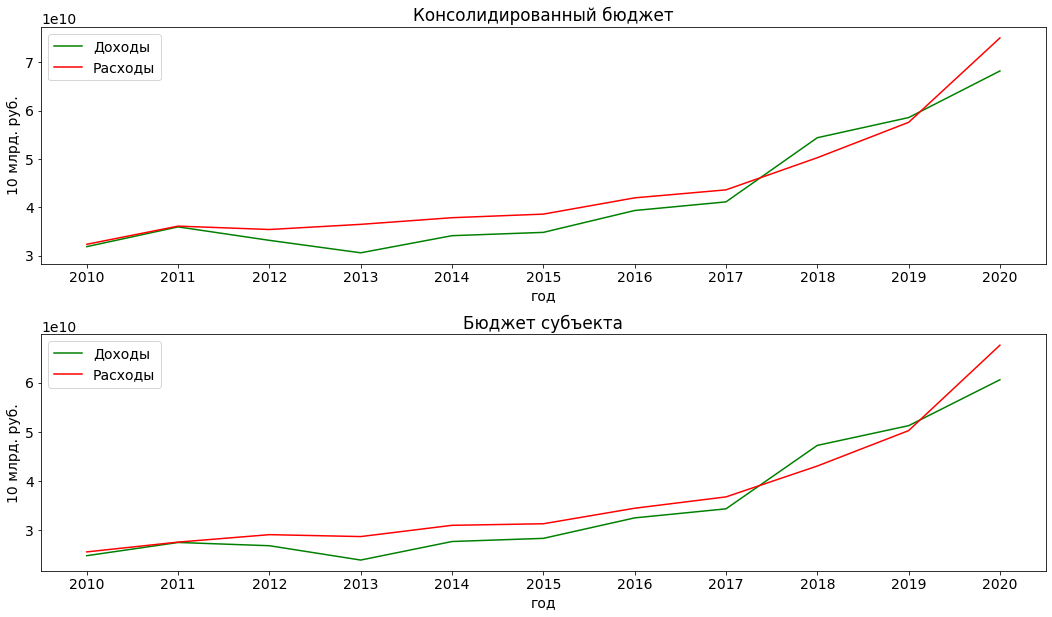

In [7]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, figsize=(18, 10))

ax[0].set_title("Консолидированный бюджет")
ax[0].plot([x for x in data_profit.keys()], [data_profit[x].loc[0, "cons"] for x in data_profit.keys()], 'g', label="Доходы")
ax[0].plot([x for x in data_loss.keys()], [data_loss[x].loc[0, "cons"] for x in data_loss.keys()], 'r', label="Расходы")

ax[1].set_title("Бюджет субъекта")
ax[1].plot([x for x in data_profit.keys()], [data_profit[x].loc[0, "subj"] for x in data_profit.keys()], 'g', label="Доходы")
ax[1].plot([x for x in data_loss.keys()], [data_loss[x].loc[0, "subj"] for x in data_loss.keys()], 'r', label="Расходы")
for x in range(2):
    ax[x].set_ylabel("10 млрд. руб.")
    ax[x].set_xlabel("год")
    ax[x].legend(loc="best")

plt.subplots_adjust(hspace=0.3)
plt.show()

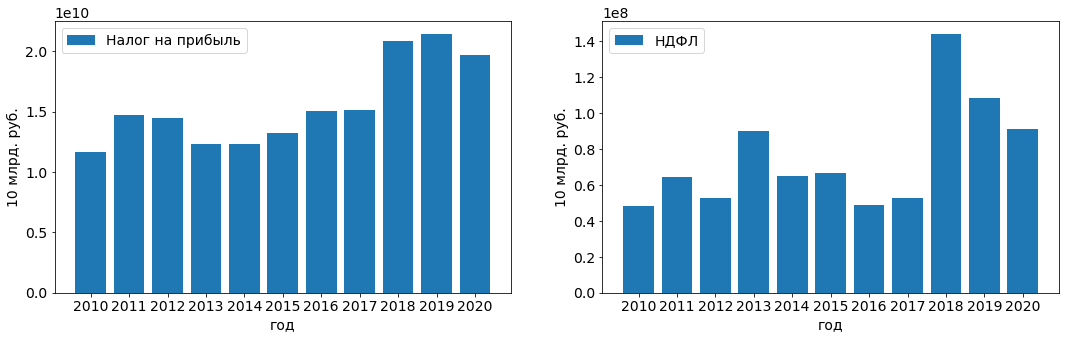

In [8]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax[0].bar(clear_df["year"], clear_df["cons_income_tax"], label="Налог на прибыль")
ax[1].bar(clear_df["year"], clear_df["cons_income_ndfl"], label="НДФЛ")
for i in range(2):
    ax[i].set_ylabel("10 млрд. руб.")
    ax[i].set_xlabel("год")
    ax[i].legend(loc="best")
plt.show()

# 3. Проверка вклада в бюджет различных статей 👑

In [9]:
def _generate_tax_dict(df: pd.DataFrame, year:str) -> tuple:
    df = df.copy()
    start_idx = df[df['name'].str.lower().str.contains("налог на прибыль организаций")].index[0]
    stop_idx = df[df['name'].str.lower().str.contains("государственная пошлина")].index[0]
    
    df = df.iloc[start_idx : stop_idx]
    cons = {}
    for i in range(len(df)):
        cons[df.iloc[i, 0]] = df.iloc[i]["cons"]
    
    subj = {}
    for i in range(len(df)):
        subj[df.iloc[i, 0]] = df.iloc[i]["subj"]
    
    cons = pd.DataFrame(cons, index=[0])
    
    
    subj = pd.DataFrame(subj, index=[0])
    
    return cons, subj

In [10]:
tax = {}
tax["cons"], tax["subj"] = _generate_tax_dict(data_profit["2010"], "2010")
for i in list(data_profit.keys())[1:]:
    temp_1, temp_2 = _generate_tax_dict(data_profit[i], i)
    tax["cons"] = tax["cons"].append(temp_1, ignore_index=True)
    tax["subj"] = tax["subj"].append(temp_2, ignore_index=True)
    
del temp_1, temp_2

for i in ["cons", "subj"]:
    tax[i] = tax[i].T
    tax[i] = tax[i].reset_index()
    tax[i] = tax[i].rename(columns={"index": "name", 0: "2010", 1: "2011", 2: "2012", 3: "2013", 4: "2014", 5: "2015", 6: "2016", 7: "2017", 8: "2018", 9: "2019", 10: "2020"})
    tax[i] = tax[i].fillna(0)
    tax[i]["mean"] = tax[i].mean(axis=1)
    # Удаление составных категорий
    tax[i] = tax[i].drop(tax[i][tax[i]['name'].str.lower().str.contains("налоги на имущество")].index[0])
    tax[i] = tax[i].drop(tax[i][tax[i]['name'].str.lower().str.contains("налоги на товары")].index[0])

## Топ-5 самых прибыльных и Топ-5 самых убыльных строк дохода [налоги] 🔀

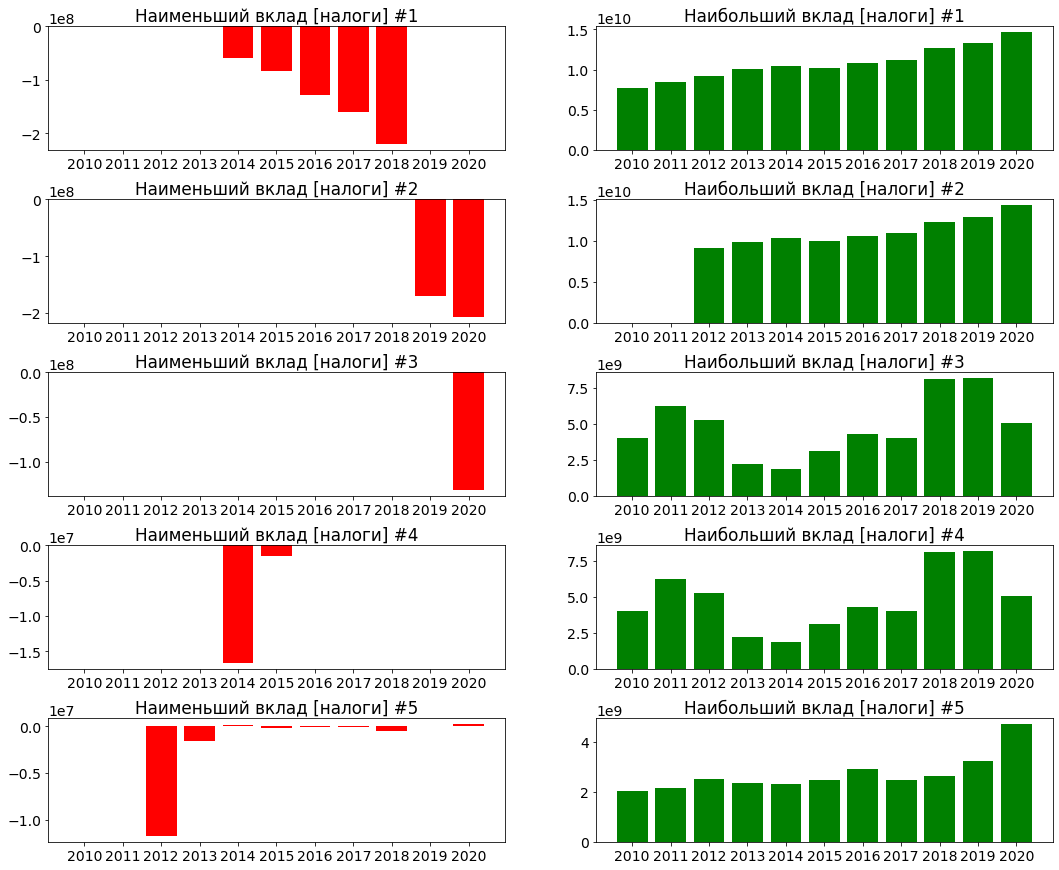

In [11]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(5, 2, figsize=(18, 15))

for i in range(5):
    ax[i, 0].bar(clear_df["year"], tax["cons"].nsmallest(5, 'mean').iloc[i, 1:-1], color="r")
    ax[i, 0].set_title(f"Наименьший вклад [налоги] #{i + 1}")
    ax[i, 1].bar(clear_df["year"], tax["cons"].nlargest(5, 'mean').iloc[i, 1:-1], color="g")
    ax[i, 1].set_title(f"Наибольший вклад [налоги] #{i + 1}")
plt.subplots_adjust(hspace=.4)
plt.show()

In [12]:
print("Легенда\n\nНаименьший вклад")
for i in range(5):
    print(i+1, tax["cons"].nsmallest(5, 'mean').iloc[i, 0])
print("\nНаибольший вклад")
for i in range(5):
    print(i+1, tax["cons"].nlargest(5, 'mean').iloc[i, 0])

Легенда

Наименьший вклад
1 Доходы от уплаты акцизов на прямогонный бензин, подлежащие распределению между бюджетами субъектов Российской Федерации и местными бюджетами с учетом установленных дифференцированных нормативов отчислений в местные бюджеты
2 Доходы от уплаты акцизов на прямогонный бензин, подлежащие распределению между бюджетами субъектов Российской Федерации и местными бюджетами с учетом установленных дифференцированных нормативов отчислений в местные бюджеты (по нормативам, установленным Федеральным законом о федеральном бюджете в целях формирования дорожных фондов субъектов Российской Федерации)
3 Доходы от уплаты акцизов на прямогонный бензин, подлежащие распределению между бюджетами субъектов Российской Федерации и местными бюджетами с учетом установленных дифференцированных нормативов отчислений в местные бюджеты (по нормативам, установленным Федеральным законом о федеральном бюджете в целях реализации национального проекта "Безопасные и качественные автомобильные доро

## Анализ корелляций 🕵️‍

In [13]:
def _generate_dict(df: pd.DataFrame, year:str) -> tuple:
    df = df.copy()
    
    df = df.iloc[1:]
    cons = {}
    for i in range(len(df)):
        cons[df.iloc[i, 0]] = df.iloc[i]["cons"]
    
    subj = {}
    for i in range(len(df)):
        subj[df.iloc[i, 0]] = df.iloc[i]["subj"]
    
    cons = pd.DataFrame(cons, index=[0])
    
    
    subj = pd.DataFrame(subj, index=[0])
    
    return cons, subj

In [14]:
all_income = {}
all_income["cons"], all_income["subj"] = _generate_dict(data_profit["2010"], "2010")
for i in list(data_profit.keys())[1:]:
    temp_1, temp_2 = _generate_dict(data_profit[i], i)
    all_income["cons"] = all_income["cons"].append(temp_1, ignore_index=True)
    all_income["subj"] = all_income["subj"].append(temp_2, ignore_index=True)
    
del temp_1, temp_2

for i in ["cons", "subj"]:
    all_income[i] = all_income[i].T
    all_income[i] = all_income[i].reset_index()
    all_income[i] = all_income[i].rename(columns={"index": "name", 0: "2010", 1: "2011", 2: "2012", 3: "2013", 4: "2014", 5: "2015", 6: "2016", 7: "2017", 8: "2018", 9: "2019", 10: "2020"})
    all_income[i] = tax[i].fillna(0)
    all_income[i]["mean"] = all_income[i].mean(axis=1)

In [15]:
corr_matrix = all_income["cons"].set_index("name").T.corr()

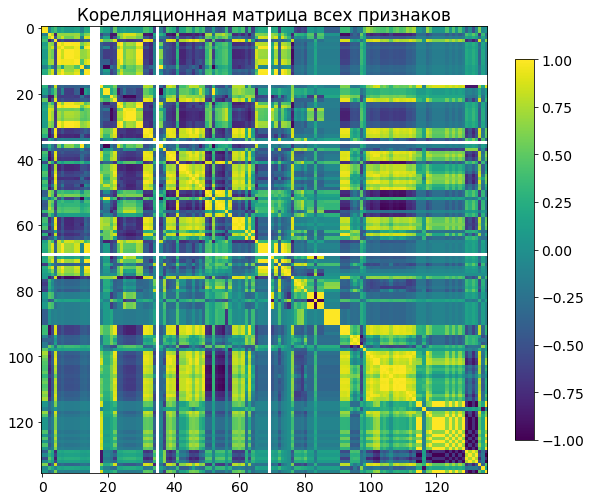

In [16]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(10, 10))
clr = ax.imshow(corr_matrix.values)
fig.colorbar(clr, ax=ax, shrink=0.7)
plt.title("Корелляционная матрица всех признаков")
plt.show()

In [17]:
less_corr = corr_matrix[corr_matrix == 0].dropna(axis=1, how="all").dropna(axis=0, how="all")

In [18]:
print("Наиболее слабо кореллируемые признаки\n\n")
for ix, i in enumerate(less_corr.columns.to_list()):
    print(ix, i)

Наиболее слабо кореллируемые признаки


0 Акцизы на спирт этиловый из всех видов сырья (в том числе этиловый спирт-сырец из всех видов сырья), производимый на территории Российской Федерации
1 Акцизы на спирт этиловый (в том числе этиловый спирт-сырец) из пищевого сырья, производимый на территории Российской Федерации
2 Доходы от выдачи патентов на осуществление предпринимательской деятельности при применении упрощенной системы налогообложения
3 Земельный налог, взимаемый по ставкам, установленным в соответствии с подпунктом 1 пункта 1 статьи 394 Налогового кодекса Российской Федерации и применяемым к объектам налогообложения, расположенным в границах межселенных территорий
4 Налог на имущество физических лиц, взимаемый по ставкам, применяемым к объектам налогообложения, расположенным в границах межселенных территорий
5 Доходы от уплаты акцизов на дизельное топливо, направляемые в уполномоченный территориальный орган Федерального казначейства для распределения в бюджеты субъектов Росси

# 4. Модели 👑

1. Построеная базовая модель `ARIMA`
2. Построены `отдельные модели для наиболее значимых параметров`, их совокупность будет основой планирования.
3. Ввиду того, что достаточно небольшая историческая глубина данных, **не приминимы методы** `глубокого обучения` для прогназирования, а так же `нейросетевой` подход. В тетрадке далее реализованы указанные методы, *при увеличение количества данных, возможно, будут эффективными*.
4. Построена `модель получения прогноза` для общего бюджета.

## 4.1. Базовая модель ARIMA 🧭

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn import linear_model

In [20]:
main_series = {}
main_series["profit"] = clear_df["cons_all_profit"]
main_series["loss"] = clear_df["cons_all_loss"]

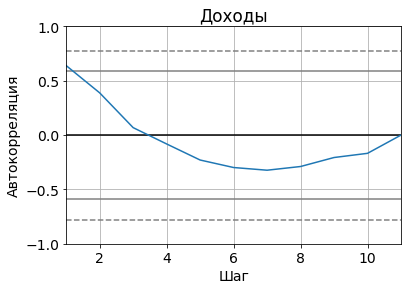

In [21]:
autocorrelation_plot(main_series["profit"])
plt.xlabel("Шаг")
plt.ylabel("Автокорреляция")
plt.title("Доходы")
plt.show()

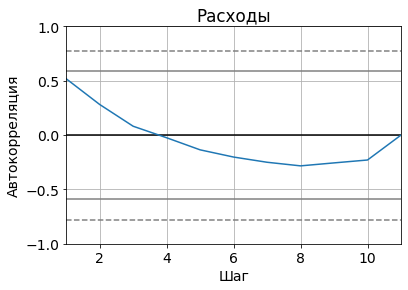

In [22]:
autocorrelation_plot(main_series["loss"])
plt.xlabel("Шаг")
plt.ylabel("Автокорреляция")
plt.title("Расходы")
plt.show()

In [23]:
def _arima_forecast(sr:pd.Series) -> pd.Series:
    model = ARIMA(sr, order=(3,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    return output

In [24]:
arima_forecast = {}
arima_forecast["profit"] = main_series["profit"][:5].to_list()
arima_forecast["loss"] = main_series["loss"][:5].to_list()
for i in range(5, len(main_series["loss"])):
    arima_forecast["profit"].append(_arima_forecast(main_series["profit"][:i]).values[0])
    arima_forecast["loss"].append(_arima_forecast(main_series["loss"][:i]).values[0])

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

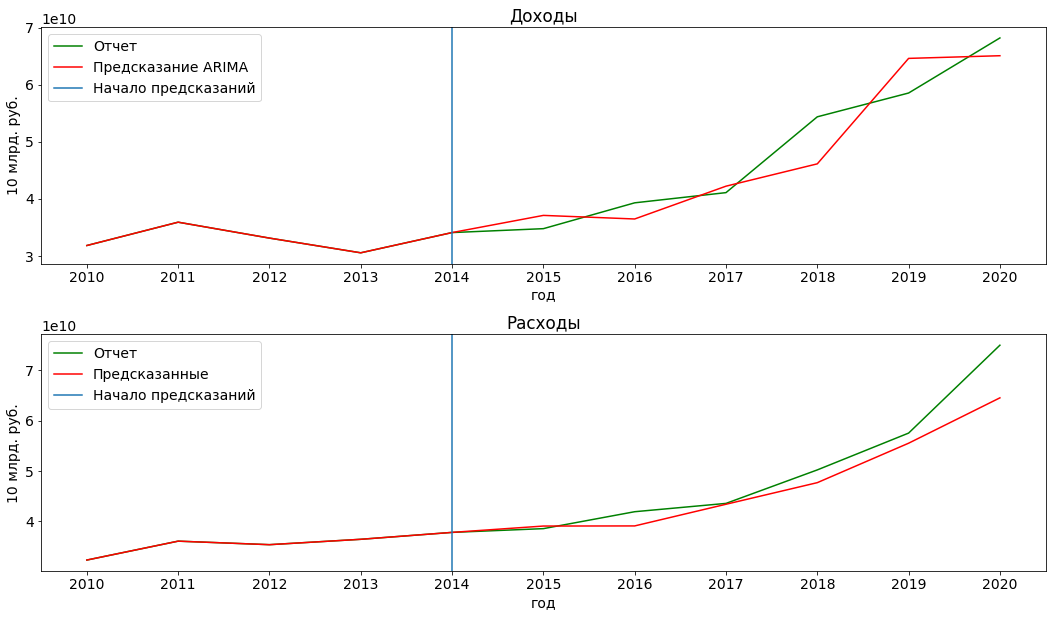

In [25]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, figsize=(18, 10))

ax[0].set_title("Доходы")
ax[0].plot([x for x in data_profit.keys()], [data_profit[x].loc[0, "cons"] for x in data_profit.keys()], 'g', label="Отчет")
ax[0].plot([x for x in data_profit.keys()], arima_forecast["profit"], 'r', label="Предсказание ARIMA")
ax[0].axvline(x=4, label="Начало предсказаний")

ax[1].set_title("Расходы")
ax[1].plot([x for x in data_loss.keys()], [data_loss[x].loc[0, "cons"] for x in data_loss.keys()], 'g', label="Отчет")
ax[1].plot([x for x in data_loss.keys()], arima_forecast["loss"], 'r', label="Предсказанные")
ax[1].axvline(x=4, label="Начало предсказаний")
for x in range(2):
    ax[x].set_ylabel("10 млрд. руб.")
    ax[x].set_xlabel("год")
    ax[x].legend(loc="best")

plt.subplots_adjust(hspace=0.3)
plt.show()

Предсказание всегда делается на `1` год вперед на основе **всей** предыдущей истории. Начало предсказания - с `2015` года

Параметры модели подбирались под данные, возможно переобучение, необходима более глубокая история.

В качестве критериев использвется следующие:
1. Максимальное отклонение (`%`)
2. Среднее отклонение (`%`)
3. Смещение предсказание (`вверх/вниз`) - насколько предсказание имеет тенденцию к смещению относительно реальных данных

In [26]:
def _calc_metrics(ts:list, ps:list, p_idx:int) -> dict:
    result = {}
    temp_1 = np.array(ts) - np.array(ps)
    result["max"] = np.abs(temp_1).max() / np.array(ts)[np.argmax(temp_1)] * 100.
    
    temp_2 = []
    temp_3 = []
    for i in range(p_idx, len(ps)):
        temp_2.append(temp_1[i] / ts[i] * 100.)
        temp_3.append(ts[i] - ps[i])
        
    result["mean"] = np.array(temp_2).mean()
    if sum(temp_3) > 0:
        result["line"] = "Смещено вниз"
        return result
    if sum(temp_3) < 0:
        result["line"] = "Смещено вверх"
        return result

In [27]:
temp_1 = _calc_metrics([data_profit[x].loc[0, "cons"] for x in data_profit.keys()], arima_forecast["profit"], 4)
temp_2 = _calc_metrics([data_loss[x].loc[0, "cons"] for x in data_loss.keys()], arima_forecast["loss"], 4)
print(5 * "=" + " Результаты ARIMA " + "=" * 5)
print("{:20s}|{:17s}|{:17s}|{}".format("Целевая переменная", "Макс. отклонение", "Ср. отклонение", "Смещение"))
print("{:20s}|{:17s}|{:17s}|{}".format("Доходы", str(round(temp_1["max"], 4)) + "%", str(round(temp_1["mean"], 4)) + "%", temp_1["line"]))
print("{:20s}|{:17s}|{:17s}|{}".format("Расходы", str(round(temp_2["max"], 4)) + "%", str(round(temp_2["mean"], 4)) + "%", temp_2["line"]))

===== Результаты ARIMA =====
Целевая переменная  |Макс. отклонение |Ср. отклонение   |Смещение
Доходы              |15.1381%         |1.0166%          |Смещено вниз
Расходы             |13.9384%         |4.0367%          |Смещено вниз


## 4.2. Отдельные модели для наиболее значимых параметров 🔄

>Ввиду того, что показатели со слабой корреляцией редко встречаются в данных было принято решение выбрать строки, которые содержат данные за весь период.

In [28]:
idx = []
for i in range(len(all_income["cons"])):
    if len(all_income["cons"].iloc[i].to_numpy().nonzero()[0]) == 13:
        idx.append(i)
many_target = all_income["cons"].iloc[idx]

In [29]:
def _arima_forecast_many(sr:pd.Series) -> pd.Series:
    model = ARIMA(sr, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    return output

def _input_vector(df:pd.DataFrame, idx: int) -> np.array:
    result = []
    for i in range(len(df)):
        result.append(_arima_forecast_many(df.iloc[i, 1:idx].astype(float)).values[0])
    return np.array(result)

In [30]:
x_true = many_target.iloc[:, 1 : len(many_target.columns) - 1].values.T
x = [_input_vector(many_target, i) for i in range(6, len(many_target.columns) - 1)]
x = np.asarray(x)
x = np.vstack([many_target.iloc[:, 1 : 6].values.T, x])

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\root\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency infor

In [31]:
print(5 * "=" + " Метрики по отдельным полям " + "=" * 5)
print("{:30s}|{:17s}|{:17s}|{}".format("Целевая переменная", "Макс. отклонение", "Ср. отклонение", "Смещение"))
for i in range(x.shape[1]):
    temp_1 = _calc_metrics(x_true.T[i], x.T[i], 5)
    print("{:30s}|{:17s}|{:17s}|{}".format(many_target.iloc[i, 0][:27] + "...", str(round(temp_1["max"], 5)) + "%", str(round(temp_1["mean"], 4)) + "%", temp_1["line"]))
    del temp_1

===== Метрики по отдельным полям =====
Целевая переменная            |Макс. отклонение |Ср. отклонение   |Смещение
Налог на прибыль организаци...|51.58446%        |3.4241%          |Смещено вниз
Налог на прибыль организаци...|51.58446%        |3.4241%          |Смещено вниз
Налог на доходы физических ...|12.06971%        |4.8159%          |Смещено вниз
Акцизы по подакцизным товар...|30.58778%        |9.9204%          |Смещено вниз
Акцизы на пиво, производимо...|43.22967%        |0.5016%          |Смещено вверх
НАЛОГИ НА СОВОКУПНЫЙ ДОХОД... |7.59117%         |5.6239%          |Смещено вниз
Налог, взимаемый в связи с ...|7.754%           |4.6896%          |Смещено вниз
Единый налог на вмененный д...|19.73403%        |-7.8179%         |Смещено вверх
Единый сельскохозяйственный...|73.80545%        |20.8875%         |Смещено вниз
Налог на имущество физическ...|25.1692%         |17.3673%         |Смещено вниз
Налог на имущество физическ...|37.62069%        |12.0884%         |Смещено вниз
Нал

>При дальнейшем развитии необходимо привлечь дополнительные данные в разделы с большим (*более 25%* отклонением)

In [32]:
def _lreg(x:np.array, y:np.array) -> float:
    reg = linear_model.ARDRegression(n_iter=500, alpha_1=1e-01, alpha_2=1e-01, lambda_1=1e-01, lambda_2=1e-01, threshold_lambda=1000.0)
    reg.fit(x[:-1], y)
    
    return reg.predict(x)[-1]

In [33]:
lr_forecast = {}
lr_forecast["profit_true"] = main_series["profit"][:5].to_list()
lr_forecast["profit_pred"] = main_series["profit"][:5].to_list()
for i in range(5, len([data_loss[x].loc[0, "cons"] for x in data_loss.keys()])):
    lr_forecast["profit_true"].append(_lreg(x_true[:i], np.asarray([data_loss[x].loc[0, "cons"] for x in data_loss.keys()])[:i-1]))
    lr_forecast["profit_pred"].append(_lreg(x[:i], np.asarray([data_loss[x].loc[0, "cons"] for x in data_loss.keys()])[:i-1]))

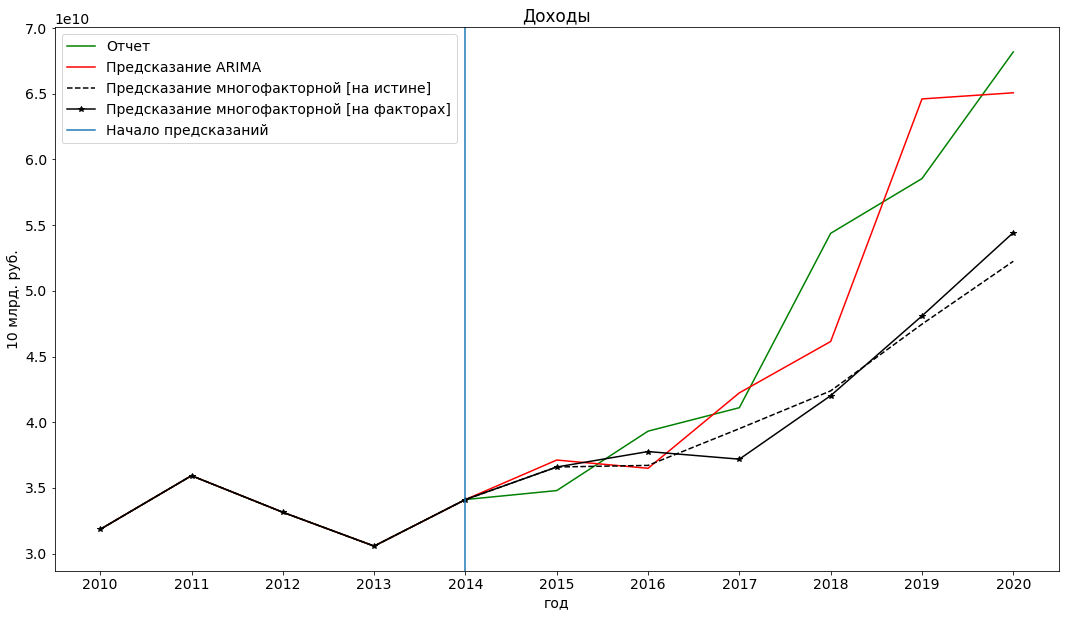

In [34]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(18, 10))

ax.set_title("Доходы")
ax.plot([x for x in data_profit.keys()], [data_profit[x].loc[0, "cons"] for x in data_profit.keys()], 'g', label="Отчет")
ax.plot([x for x in data_profit.keys()], arima_forecast["profit"], 'r', label="Предсказание ARIMA")
ax.plot([x for x in data_profit.keys()], lr_forecast["profit_true"], 'k--', label="Предсказание многофакторной [на истине]")
ax.plot([x for x in data_profit.keys()], lr_forecast["profit_pred"], 'k-*', label="Предсказание многофакторной [на факторах]")
ax.axvline(x=4, label="Начало предсказаний")

ax.set_ylabel("10 млрд. руб.")
ax.set_xlabel("год")
ax.legend(loc="best")

plt.subplots_adjust(hspace=0.3)
plt.show()

Под `[на истине]` подразумевается обучение регрессионой модели на исторических данных, `[на факторах]` &minus; обучение на данных, полученных из предсказаний на предыдущем шаге